# Static views
In this notebook we demonstrate how to create static views of images with additional information such as shape, data type and size of the pixel array, minimum and maximum intensity and histograms.

In [1]:
from stackview import insight, jupyter_displayable_output
from skimage.io import imread, imshow
from skimage.filters import gaussian
from skimage.measure import label

In [2]:
image = imread('data/Haase_MRT_tfl3d1.tif')

The `insight` function turns a numpy-array into a numpy-compatible array that has an image-display in jupyter notebooks.

StackViewNDArray([[   0,    0,    0, ...,    0,    0,    0],
                  [   0,  381, 1450, ..., 1373,  992,  687],
                  [   0,  381, 1755, ..., 1297,  305,  916],
                  ...,
                  [   0,    0,    0, ...,  610,  687, 1984],
                  [   0,    0,    0, ...,  839,  458, 1526],
                  [   0,    0,    0, ...,  839,  916,  992]], dtype=uint16)
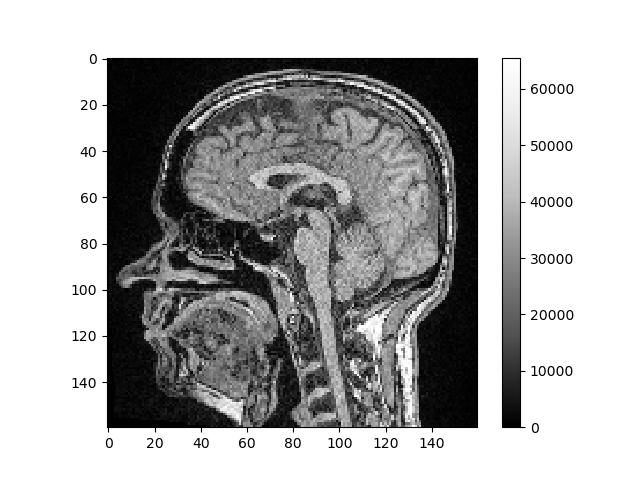
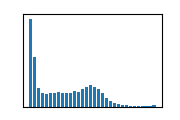

In [3]:
insight(image[60])

StackViewNDArray([[0, 0, 0, ..., 5, 5, 5],
                  [0, 0, 0, ..., 5, 5, 5],
                  [0, 0, 0, ..., 5, 5, 5],
                  ...,
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0]])
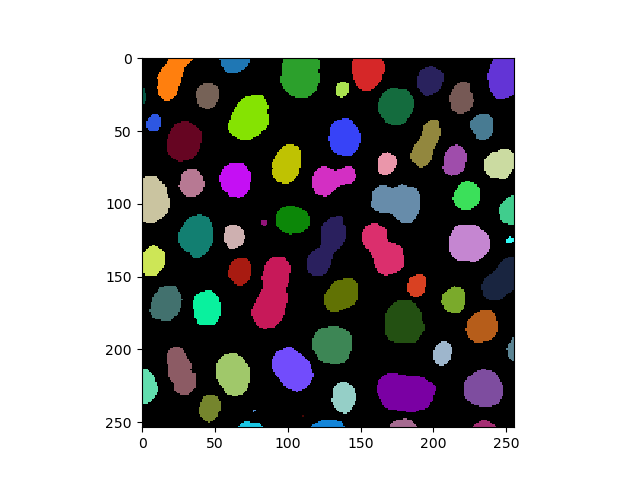

In [4]:
blobs = imread('data/blobs.tif')
labels = label(blobs > 120)

insight(labels)

The function `insight` returns a variable that can be post-processed using common libraries, it aims to be just a numpy-array with some extras.

In [5]:
sv_image = insight(image[60])
type(sv_image)

stackview._static_view.StackViewNDArray

StackViewNDArray([[   0,    0,    0, ...,    0,    0,    0],
                  [   0,  381, 1450, ..., 1373,  992,  687],
                  [   0,  381, 1755, ..., 1297,  305,  916],
                  ...,
                  [   0,    0,    0, ...,  610,  687, 1984],
                  [   0,    0,    0, ...,  839,  458, 1526],
                  [   0,    0,    0, ...,  839,  916,  992]], dtype=uint16)
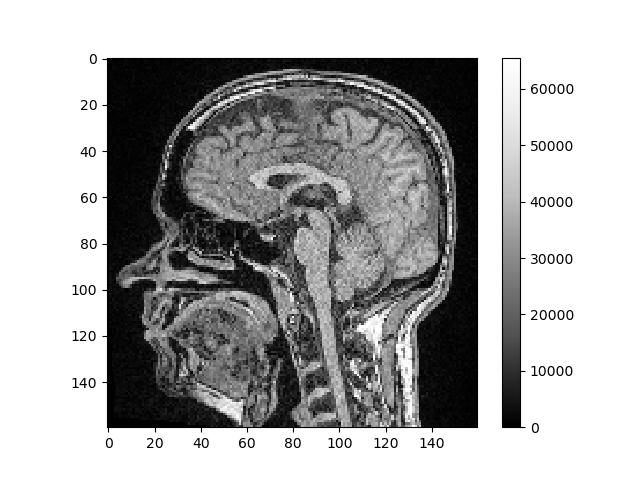
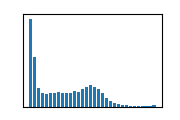

In [6]:
sv_image

After processing the `insight` generated image, e.g. using the `gaussian` function from scikit-image, the result must be converted again to have the display.

In [7]:
result = gaussian(sv_image, sigma=6)
type(result)

numpy.ndarray

StackViewNDArray([[0.00370651, 0.00426108, 0.00481234, ..., 0.00710816,
                   0.00697263, 0.00685315],
                  [0.0042273 , 0.00485844, 0.00548581, ..., 0.00816649,
                   0.00801763, 0.00788711],
                  [0.00473856, 0.00544452, 0.00614624, ..., 0.00923175,
                   0.00907213, 0.00893312],
                  ...,
                  [0.00463481, 0.00552068, 0.00645748, ..., 0.01694976,
                   0.01634085, 0.01584955],
                  [0.00390661, 0.00465442, 0.00544576, ..., 0.01716718,
                   0.01655641, 0.01606671],
                  [0.00322669, 0.0038455 , 0.00450086, ..., 0.01736883,
                   0.01675237, 0.01626037]])
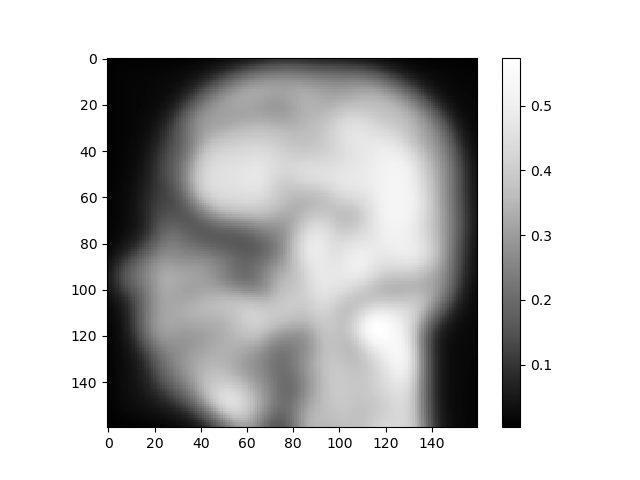
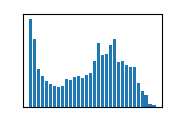

In [8]:
insight(result)

## Custom functions
When implementing custom image processing functions, those can be annotated so that the result becomes an `insight` image automatically.

In [9]:
@jupyter_displayable_output
def my_gaussian(image, sigma):
    return gaussian(image, sigma)

StackViewNDArray([[0.00212939, 0.00344053, 0.00476471, ..., 0.00583083,
                   0.00560638, 0.00537486],
                  [0.00327628, 0.00530667, 0.00735382, ..., 0.00866562,
                   0.00837849, 0.00809373],
                  [0.00437608, 0.00708168, 0.00979352, ..., 0.0110469 ,
                   0.0107322 , 0.01043783],
                  ...,
                  [0.00063916, 0.0014103 , 0.00256736, ..., 0.01399779,
                   0.01456949, 0.01554148],
                  [0.00028084, 0.00062272, 0.00114119, ..., 0.01403081,
                   0.01471743, 0.01585427],
                  [0.00010142, 0.00022578, 0.00041603, ..., 0.01400911,
                   0.01458054, 0.01561444]])
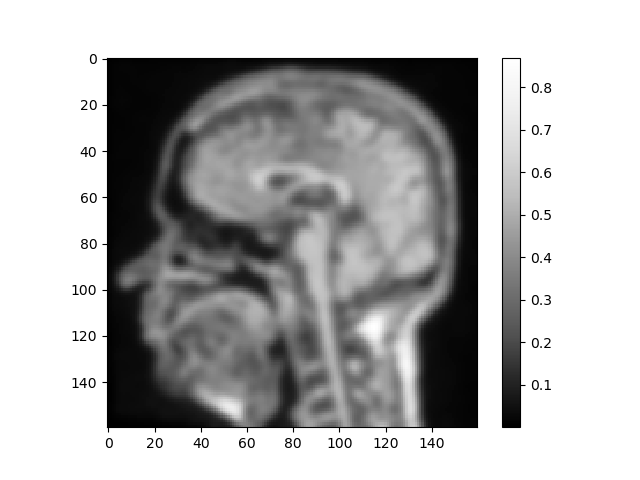
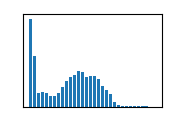

In [10]:
my_gaussian(image[60], 2)

It is recommended to add a library name of your library and a link to the documentation so that users can click  the link right in the `insight` display.

In [11]:
@jupyter_displayable_output(library_name="clesperanto", help_url="https://github.com/clesperanto")
def cle_gaussian(image, sigma):
    import pyclesperanto_prototype as cle
    return cle.gaussian_blur(image, sigma_x=sigma, sigma_y=sigma)

StackViewNDArray([[5.27978058e+01, 1.64570343e+02, 2.61079163e+02, ...,
                   3.16405029e+02, 2.84286743e+02, 2.40542450e+02],
                  [1.24606766e+02, 3.96521637e+02, 6.54013428e+02, ...,
                   7.18867004e+02, 6.43725464e+02, 5.69837952e+02],
                  [1.65524872e+02, 5.44341736e+02, 9.49922180e+02, ...,
                   9.70090820e+02, 8.74096619e+02, 8.09579529e+02],
                  ...,
                  [4.06006604e-01, 5.16509247e+00, 2.62547874e+01, ...,
                   7.71678833e+02, 9.35180176e+02, 1.20644006e+03],
                  [3.15837264e-02, 4.01614636e-01, 2.04012704e+00, ...,
                   7.70590942e+02, 9.28915710e+02, 1.20594690e+03],
                  [9.25589004e-04, 1.17663806e-02, 5.97464181e-02, ...,
                   7.89296997e+02, 9.06250427e+02, 1.05993542e+03]],
                 dtype=float32)
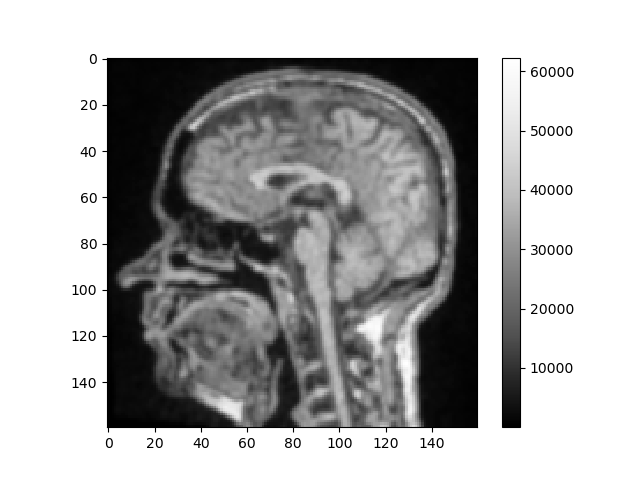
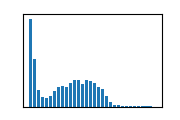

In [12]:
cle_gaussian(image[60], 1)